In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import tensorflow as tf
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('45 channel 1sec deltapower with labels.csv')


print('Number of rows and columns:', df.shape)
df.head(5)


Number of rows and columns: (8391, 46)


,1.7684,4.5086,6.5071,3.7271,3.0514,1.4297,3.9083,8.2294,2.8497,1.8704,1.5071,6.7917,2.6181,1.9082,2.0764,0.33154,0.058108,1.3143,2.0596,0.46565,0.18181,0.0021533,0.91821,1.063,2.6008,2.8307,5.3624,31.953,3.8214,1.869,1.7548,6.5689,2.8358,1.9051,6.5849,7.843,0.011987,1.4325,6.9551,0.047714,1.6717,0.23703,0.03289,0.78239,1.8171,1
0,8.2322,2.5863,23.3620,4.58920,2.63090,0.77251,15.2240,18.1580,4.32550,0.66911,1.5043,16.1200,3.08250,0.54546,8.1134,1.03390,0.027597,3.18110,6.2564,1.23400,0.53262,0.079180,3.02190,4.0032,4.69280,3.20650,14.0420,113.9900,3.8210,0.43809,0.8946,15.9750,2.85810,0.92874,16.1300,9.9888,0.020134,5.4615,10.3190,0.25983,7.0917,0.92496,0.100680,2.35200,5.5935,1
1,6.6729,6.8455,24.4800,9.99930,7.27210,5.62570,5.5126,10.9120,8.33050,4.43190,2.1705,8.6237,7.14330,3.58270,7.2908,1.48690,0.016880,3.30770,4.1827,1.48360,0.64390,0.012038,3.59130,2.0915,8.51080,7.26250,7.2649,77.3230,8.3019,5.20300,5.2790,8.3504,7.79270,4.29410,8.1360,25.5020,0.031593,5.3559,6.0767,0.12722,6.9998,1.25260,0.087094,3.30850,3.4021,1
2,4.0293,4.0328,3.6919,0.87939,1.22710,3.27990,1.5826,2.2255,0.73584,2.20310,2.7167,2.4118,0.80343,2.18630,8.1966,0.87102,0.042386,2.33570,2.1603,1.94540,0.66207,0.072691,0.93589,1.5997,0.64624,1.02630,1.8260,4.7707,1.0139,2.28820,2.8065,2.0406,0.91520,2.62320,2.7858,2.0624,0.041075,7.4620,6.0018,0.21232,7.4797,0.88127,0.032423,0.83372,1.3956,1
3,5.8776,2.9625,5.0014,2.96810,1.97810,1.05720,3.3335,5.0303,2.31000,1.09130,1.2063,4.3712,1.94290,0.66435,2.1034,0.34541,0.042272,0.85818,1.4909,0.60984,0.12897,0.036962,2.26810,1.6081,2.94130,2.06520,3.8184,19.0360,1.9605,1.19740,1.2336,4.2318,1.95070,0.94428,4.0073,5.3486,0.005816,2.2289,2.5151,0.15538,1.0744,0.24961,0.035152,2.13720,2.2602,1
4,6.4841,1.9557,2.1591,1.31560,0.93701,1.01110,6.2857,9.3908,0.98113,0.72781,1.1802,7.9375,0.80239,0.78790,2.6544,1.70380,0.047668,1.14550,2.4446,2.10900,1.22080,0.086793,2.30110,13.4930,1.25430,0.96433,6.2005,29.3660,1.0295,0.99498,1.0906,7.0356,0.93012,0.80551,7.5308,3.0671,0.091484,2.5945,5.5878,0.20725,2.4711,1.41010,0.227580,0.69148,5.6206,1




**Labelling COLUMNS**

In [16]:
print(df.columns)

Index(['1.7684', '4.5086', '6.5071', '3.7271', '3.0514', '1.4297', '3.9083',
       '8.2294', '2.8497', '1.8704', '1.5071', '6.7917', '2.6181', '1.9082',
       '2.0764', '0.33154', '0.058108', '1.3143', '2.0596', '0.46565',
       '0.18181', '0.0021533', '0.91821', '1.063', '2.6008', '2.8307',
       '5.3624', '31.953', '3.8214', '1.869', '1.7548', '6.5689', '2.8358',
       '1.9051', '6.5849', '7.843', '0.011987', '1.4325', '6.9551', '0.047714',
       '1.6717', '0.23703', '0.03289', '0.78239', '1.8171', '1'],
      dtype='object')


In [17]:
new_names = {'1.7684':'a', '4.5086':'b', '6.5071':'c', '3.7271':'cd', '3.0514':'d','1.4297':'de','3.9083':'e','8.2294':'f',
             '2.8497':'g',
       '1.8704':'l', '1.5071':'m', '6.7917':'n', '2.6181':'o', '1.9082':'p', '2.0764':'q', '0.33154':'r',
       '0.058108':'s', '1.3143':'t', '2.0596':'u', '0.46565':'v', '0.18181':'w', '0.0021533':'x', '0.91821':'y',
       '1.063':'z', '2.6008':'aa', '2.8307':'bb', '5.3624':'cc', '31.953':'dd', '3.8214':'ee',
       '1.869':'ff', '1.7548':'gg', '6.5689':'hh', '2.8358':'ii', '1.9051':'jj', '6.5849':'kk',
       '7.843':'ll', '0.011987':'mm', '1.4325':'nn', '6.9551':'oo', '6.9551':'pp', '0.047714':'qq',
       '1.6717':'rr','0.23703':'j','0.03289':'k','0.78239':'h','1.8171':'i','1':'labels'}
df= df.rename(index=str, columns=new_names)

***Checking any null Values***

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8391 entries, 0 to 8390
Data columns (total 46 columns):
a         8391 non-null float64
b         8391 non-null float64
c         8391 non-null float64
cd        8391 non-null float64
d         8391 non-null float64
de        8391 non-null float64
e         8391 non-null float64
f         8391 non-null float64
g         8391 non-null float64
l         8391 non-null float64
m         8391 non-null float64
n         8391 non-null float64
o         8391 non-null float64
p         8391 non-null float64
q         8391 non-null float64
r         8391 non-null float64
s         8391 non-null float64
t         8391 non-null float64
u         8391 non-null float64
v         8391 non-null float64
w         8391 non-null float64
x         8391 non-null float64
y         8391 non-null float64
z         8391 non-null float64
aa        8391 non-null float64
bb        8391 non-null float64
cc        8391 non-null float64
dd        8391 non-null float64
ee

In [14]:
pd.set_option('display.max_columns', None)
print(df.describe())



                 a            b            c           cd            d  \
count  8391.000000  8391.000000  8391.000000  8391.000000  8391.000000   
mean     10.484143    10.158776    10.619706    21.851499     9.340318   
std      27.172551    27.657020    60.908168    34.396418    17.560465   
min       0.121380     0.127770     0.098052     0.076606     0.086320   
25%       2.744750     2.722050     3.310400     5.453500     2.917650   
50%       5.347600     5.125900     6.217200    13.163000     5.881400   
75%      10.403000     9.610950    11.490500    27.239000    11.350500   
max    1311.700000  1225.900000  5085.100000  1226.800000  1231.100000   

                de             e            f            g            l  \
count  8391.000000   8391.000000  8391.000000  8391.000000  8391.000000   
mean      9.865880     12.665354    24.617995    11.993090     7.992421   
std      17.742570    148.675730    44.609993    19.234105    16.383983   
min       0.072419      0.131790 

***spliting the file in the data and target class***

In [18]:
data = df.iloc[:,:-1].values.tolist()
target = df.iloc[:,-1].tolist()

In [19]:

print(data)
print(target)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**heatmap**

Text(0.5, 1.0, 'Correlation of Variables')

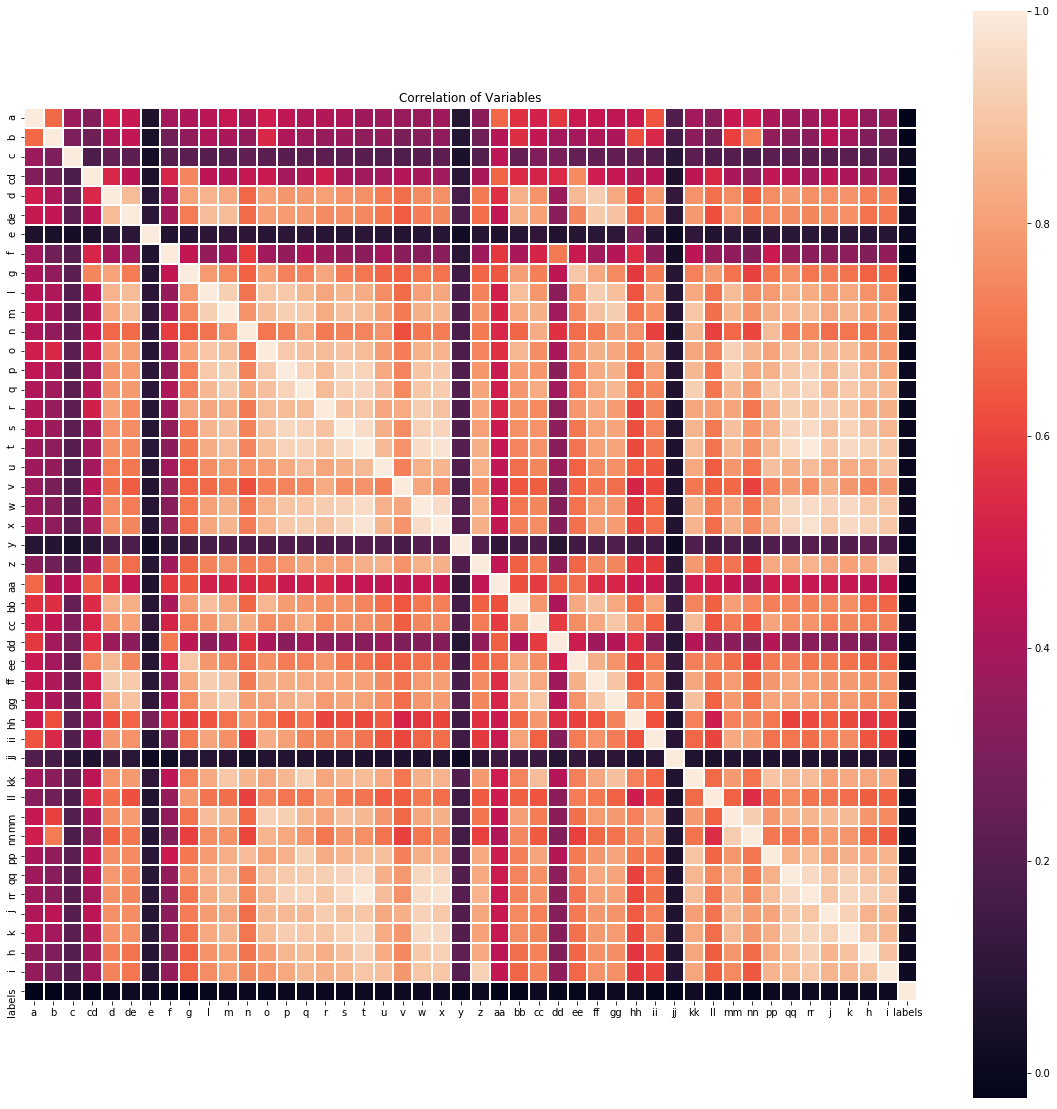

In [20]:
col_list = df.columns
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df[col_list].corr(),square=True,linewidths=1)
plt.title('Correlation of Variables')

**Normalizing**

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x =df[df.columns[:46]]
y =df.labels
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)

 **Select numerical columns which needs to be normalized**

In [22]:
train_norm = x_train[x_train.columns[0:20]]
test_norm = x_test[x_test.columns[0:20]]

**Normalize Training Data**

In [23]:
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

**Converting numpy array to dataframe**

In [24]:
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())

             a         b         c        cd         d        de         e  \
1585 -0.367232 -0.172461 -0.296441 -0.268383 -0.192483 -0.459457 -0.242023   
992   0.082610  0.081304  0.109891 -0.403990  0.154255 -0.051573  0.101993   
8204  0.430258 -0.046780 -0.292242  0.139352  0.178613  0.157048 -0.052466   
4674 -0.327810 -0.297066 -0.190164 -0.374507  0.385711  0.354120  0.396023   
3593  0.134887 -0.136001 -0.250529  0.655836  0.701551  0.442604 -0.101115   

             f         g         l         m         n         o         p  \
1585 -0.360932 -0.389111 -0.187867 -0.249768 -0.234012 -0.090579 -0.193871   
992  -0.314413  0.524819  0.895765  0.705437  0.442168  0.061482  1.017361   
8204 -0.114285  0.057034  0.500101  0.217691 -0.131115  0.182472  0.017922   
4674 -0.158472 -0.047913  0.284804  0.302435  1.706370 -0.100313  0.134473   
3593 -0.203849  0.827192  0.087308 -0.121401 -0.358830  0.239560 -0.169119   

             q         r         s         t         u        

**Normalize Testing Data by using mean and SD of training set**

In [25]:
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

             a         b         c        cd         d        de         e  \
1585 -0.367232 -0.172461 -0.296441 -0.268383 -0.192483 -0.459457 -0.242023   
992   0.082610  0.081304  0.109891 -0.403990  0.154255 -0.051573  0.101993   
8204  0.430258 -0.046780 -0.292242  0.139352  0.178613  0.157048 -0.052466   
4674 -0.327810 -0.297066 -0.190164 -0.374507  0.385711  0.354120  0.396023   
3593  0.134887 -0.136001 -0.250529  0.655836  0.701551  0.442604 -0.101115   

             f         g         l         m         n         o         p  \
1585 -0.360932 -0.389111 -0.187867 -0.249768 -0.234012 -0.090579 -0.193871   
992  -0.314413  0.524819  0.895765  0.705437  0.442168  0.061482  1.017361   
8204 -0.114285  0.057034  0.500101  0.217691 -0.131115  0.182472  0.017922   
4674 -0.158472 -0.047913  0.284804  0.302435  1.706370 -0.100313  0.134473   
3593 -0.203849  0.827192  0.087308 -0.121401 -0.358830  0.239560 -0.169119   

             q         r         s         t         u        

**Support vector machine**

In [26]:
import numpy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
def svm_classifier(): 
 
    
    X = data
    y = target
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
   
    	

     # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)    
    X_test = sc.transform(X_test)

    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 50)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score : ")
    print(accuracy_score(y_test, y_predict)*100)
    
if __name__ == '__main__':
    svm_classifier()

[[2910    9]
 [2105   11]]
Accuracy score : 
58.01390268123138


In [28]:
pip install --force-reinstall tensorflow

  Using cached https://files.pythonhosted.org/packages/34/d5/ce8c17971067c0184c9045112b755be5461d5ce5253ef65a367e1298d7c5/tensorflow-2.1.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/40/23/53ffe290341cd0855d595b0a2e7485932f473798af173bbe3a584b99bb06/tensorboard-2.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8c/23/848298cccf8e40f5bbb59009b32848a4c38f4e7f3364297ab3c3e2e2cd14/wheel-0.34.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/61/51/046cbc61c7607e5ecead6ff1a9453fba5e7e47a5ea8d608cc7036586a5ef/scipy-1.4.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a9/38/f6d6d8635d496d6b4ed5d8ca4b9f193d0edc59999c3a63779cbc38aa650f/numpy-1.18.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/pac

tables 3.5.1 requires mock>=2.0, which is not installed.
spyder 3.3.3 requires pyqt5<=5.12; python_version >= "3", which is not installed.
astroid 2.2.5 requires typed-ast>=1.3.0; implementation_name == "cpython", which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\bme-4\\anaconda3\\lib\\site-packages\\~.mpy\\.libs\\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



**sequential model**

In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
   



model = Sequential()
model.add(Dense(64, input_dim=46, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=25,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
5873/5873 [==============================] - 7s 1ms/step - loss: 1.2711 - acc: 0.5202
Epoch 2/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.9145 - acc: 0.5343
Epoch 3/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.8096 - acc: 0.5413
Epoch 4/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.7525 - acc: 0.5425
Epoch 5/25
5873/5873 [==============================] - 0s 28us/step - loss: 0.7432 - acc: 0.5491
Epoch 6/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.7216 - acc: 0.5542
Epoch 7/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.7043 - acc: 0.5663
Epoch 8/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.6998 - acc: 0.5663
Epoch 9/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.6896 - acc: 0.5869
Epoch 10/25
5873/5873 [

**LSTM MODELLING**

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=2, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

Epoch 1/10
5873/5873 [==============================] - 182s 31ms/step - loss: 0.0122 - acc: 0.9947
Epoch 2/10
5873/5873 [==============================] - 180s 31ms/step - loss: 1.0880e-07 - acc: 1.00000s - loss: 1.0880e-07 - a
Epoch 3/10
5873/5873 [==============================] - 178s 30ms/step - loss: 1.0886e-07 - acc: 1.0000
Epoch 4/10
5873/5873 [==============================] - 177s 30ms/step - loss: 1.0858e-07 - acc: 1.0000
Epoch 5/10
5873/5873 [==============================] - 178s 30ms/step - loss: 1.0842e-07 - acc: 1.0000
Epoch 6/10
5873/5873 [==============================] - 177s 30ms/step - loss: 1.0838e-07 - acc: 1.0000
Epoch 7/10
5873/5873 [==============================] - 180s 31ms/step - loss: 1.0846e-07 - acc: 1.0000
Epoch 8/10
5873/5873 [==============================] - 178s 30ms/step - loss: 1.0825e-07 - acc: 1.0000
Epoch 9/10
5873/5873 [==============================] - 176s 30ms/step - loss: 1.0820e-07 - acc: 1.0000
Epoch 10/10
2518/2518 [====================